#Auto MPG Analysis 

##Data Source
https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [5]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import mode

In [2]:

from io import StringIO
import requests
import json
import pandas as pd




df = pd.read_csv(get_object_storage_file_with_credentials_632ee46cfab0434fb72a70038eb90f0a('Titanic', 'auto-mpg.csv'))
df.head()


,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11.0,70,1,plymouth satellite
3,16,8,304,150,3433,12.0,70,1,amc rebel sst
4,17,8,302,140,3449,10.5,NaN,NaN,ford torino


In [78]:
#Number of records
len(df.index)

392

In [79]:
#Get types of fields
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg       392 non-null float64
cyl       392 non-null int64
displ     392 non-null float64
hp        392 non-null int64
weight    392 non-null int64
accel     392 non-null float64
yr        391 non-null float64
origin    391 non-null float64
name      392 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [80]:
df.shape

(392, 9)

In [3]:
df.describe()

,mpg,cyl,displ,hp,weight,accel,yr,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,391.000000,391.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.994885,1.578005
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.675975,0.806020
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [81]:
#Find blank or whitespace
df = df.replace(r'\s+\t+', np.nan, regex=True).replace('', np.nan)
#Is anythign null?
df.isnull().sum()

mpg       0
cyl       0
displ     0
hp        0
weight    0
accel     0
yr        1
origin    1
name      0
dtype: int64

In [82]:
#Fix missing values
df['yr']
df.set_value(4,'yr',70)
df['origin']
df.set_value(4,'origin',1)

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11.0,70,1,plymouth satellite
3,16,8,304,150,3433,12.0,70,1,amc rebel sst
4,17,8,302,140,3449,10.5,70,1,ford torino
5,15,8,429,198,4341,10.0,70,1,ford galaxie 500
6,14,8,454,220,4354,9.0,70,1,chevrolet impala
7,14,8,440,215,4312,8.5,70,1,plymouth fury iii
8,14,8,455,225,4425,10.0,70,1,pontiac catalina
9,15,8,390,190,3850,8.5,70,1,amc ambassador dpl


In [83]:
#How many unique values?
for column in df:
    print(column, len(df[column].unique()))

('mpg', 127)
('cyl', 5)
('displ', 81)
('hp', 93)
('weight', 346)
('accel', 95)
('yr', 13)
('origin', 3)
('name', 301)


ValueError: num must be 1 <= num <= 0, not 1

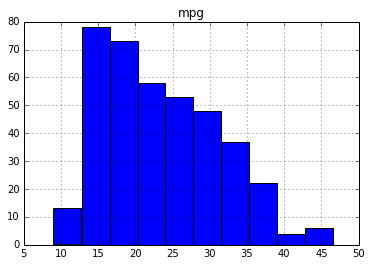

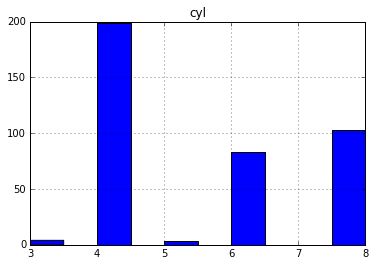

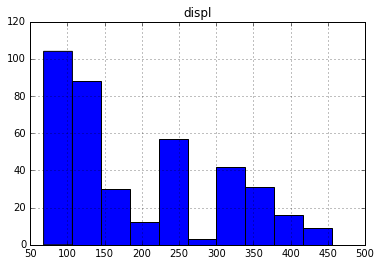

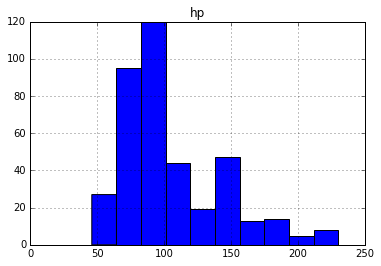

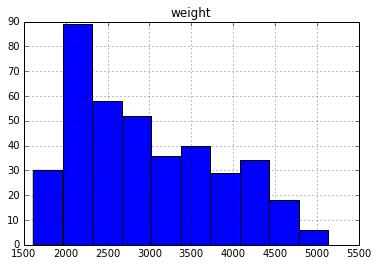

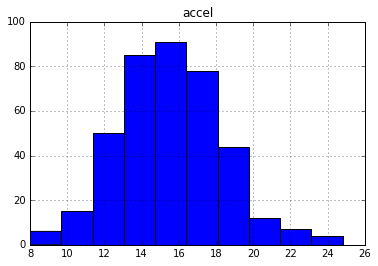

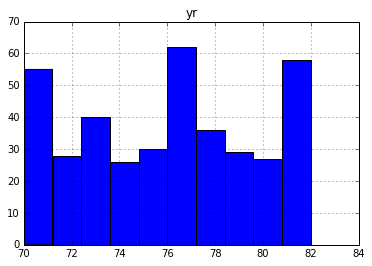

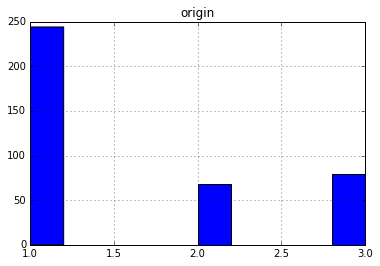

In [6]:
#Lets look at the ihstorgram of each
import matplotlib.pyplot as plt
%matplotlib inline
for col in df:
    df.hist(column=col)

In [93]:
#Change year from 2 digits to 4
#Was 70-82 so no logic for <2000
for i, row in df.iterrows():
    df.set_value(i,'yr','19'+str(row['yr']))
df.tail()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
387,27,4,140,86,2790,15.6,191982,1,ford mustang gl
388,44,4,97,52,2130,24.6,191982,2,vw pickup
389,32,4,135,84,2295,11.6,191982,1,dodge rampage
390,28,4,120,79,2625,18.6,191982,1,ford ranger
391,31,4,119,82,2720,19.4,191982,1,chevy s-10


In [131]:
#Any duplictates?
df[df.duplicated()].sum()  

mpg       0
cyl       0
displ     0
hp        0
weight    0
accel     0
yr        0
origin    0
name      0
dtype: float64

In [146]:
#Split car name into make and model
labels=["make","model"]
mike = pd.DataFrame(df['name'].apply(lambda x: x.split(' ', 1)).values.tolist(), columns=labels)
df = df.join(mike, lsuffix='_df', rsuffix='_mike')
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,make_df,model_df,make_mike,model_mike,make,model
0,18,8,307,130,3504,12.0,191970,1,chevrolet chevelle malibu,chevrolet,chevelle malibu,chevrolet,chevelle malibu,chevrolet,chevelle malibu
1,15,8,350,165,3693,11.5,191970,1,buick skylark 320,buick,skylark 320,buick,skylark 320,buick,skylark 320
2,18,8,318,150,3436,11.0,191970,1,plymouth satellite,plymouth,satellite,plymouth,satellite,plymouth,satellite
3,16,8,304,150,3433,12.0,191970,1,amc rebel sst,amc,rebel sst,amc,rebel sst,amc,rebel sst
4,17,8,302,140,3449,10.5,191970,1,ford torino,ford,torino,ford,torino,ford,torino


In [168]:
#Get Range
for col in df:
    print(col, df[col].min(), df[col].max())

('mpg', 9.0, 46.600000000000001)
('cyl', 3, 8)
('displ', 68.0, 455.0)
('hp', 46, 230)
('weight', 1613, 5140)
('accel', 8.0, 24.800000000000001)
('yr', 191970.0, 191982.0)
('origin', 1.0, 3.0)
('name', 'amc ambassador brougham', 'vw rabbit custom')
('make_df', 'amc', 'vw')
('model_df', inf, 'zephyr 6')
('make_mike', 'amc', 'vw')
('model_mike', inf, 'zephyr 6')
('make', 'amc', 'vw')
('model', inf, 'zephyr 6')


In [165]:
#Get Mean
for col in df:
    print(col, df[col].mean())

('mpg', 23.445918367346938)
('cyl', 5.4719387755102042)
('displ', 194.41198979591837)
('hp', 104.46938775510205)
('weight', 2977.5841836734694)
('accel', 15.541326530612244)
('yr', 191975.97959183675)
('origin', 1.5765306122448979)


TypeError: Could not convert chevrolet chevelle malibubuick skylark 320plymouth satelliteamc rebel sstford torinoford galaxie 500chevrolet impalaplymouth fury iiipontiac catalinaamc ambassador dpldodge challenger seplymouth 'cuda 340chevrolet monte carlobuick estate wagon (sw)toyota corona mark iiplymouth dusteramc hornetford maverickdatsun pl510volkswagen 1131 deluxe sedanpeugeot 504audi 100 lssaab 99ebmw 2002amc gremlinford f250chevy c20dodge d200hi 1200ddatsun pl510chevrolet vega 2300toyota coronaamc gremlinplymouth satellite customchevrolet chevelle malibuford torino 500amc matadorchevrolet impalapontiac catalina broughamford galaxie 500plymouth fury iiidodge monaco (sw)ford country squire (sw)pontiac safari (sw)amc hornet sportabout (sw)chevrolet vega (sw)pontiac firebirdford mustangmercury capri 2000opel 1900peugeot 304fiat 124btoyota corolla 1200datsun 1200volkswagen model 111plymouth crickettoyota corona hardtopdodge colt hardtopvolkswagen type 3chevrolet vegaford pinto runaboutchevrolet impalapontiac catalinaplymouth fury iiiford galaxie 500amc ambassador sstmercury marquisbuick lesabre customoldsmobile delta 88 royalechrysler newport royalmazda rx2 coupeamc matador (sw)chevrolet chevelle concours (sw)ford gran torino (sw)plymouth satellite custom (sw)volvo 145e (sw)volkswagen 411 (sw)peugeot 504 (sw)renault 12 (sw)ford pinto (sw)datsun 510 (sw)toyouta corona mark ii (sw)dodge colt (sw)toyota corolla 1600 (sw)buick century 350amc matadorchevrolet malibuford gran torinododge coronet custommercury marquis broughamchevrolet caprice classicford ltdplymouth fury gran sedanchrysler new yorker broughambuick electra 225 customamc ambassador broughamplymouth valiantchevrolet nova customamc hornetford maverickplymouth dustervolkswagen super beetlechevrolet impalaford countryplymouth custom suburboldsmobile vista cruiseramc gremlintoyota carinachevrolet vegadatsun 610maxda rx3ford pintomercury capri v6fiat 124 sport coupechevrolet monte carlo spontiac grand prixfiat 128opel mantaaudi 100lsvolvo 144eadodge dart customsaab 99letoyota mark iioldsmobile omegaplymouth dusteramc hornetchevrolet novadatsun b210ford pintotoyota corolla 1200chevrolet vegachevrolet chevelle malibu classicamc matadorplymouth satellite sebringford gran torinobuick century luxus (sw)dodge coronet custom (sw)ford gran torino (sw)amc matador (sw)audi foxvolkswagen dasheropel mantatoyota coronadatsun 710dodge coltfiat 128fiat 124 tchonda civicsubarufiat x1.9plymouth valiant customchevrolet novamercury monarchford maverickpontiac catalinachevrolet bel airplymouth grand furyford ltdbuick centurychevroelt chevelle malibuamc matadorplymouth furybuick skyhawkchevrolet monza 2+2ford mustang iitoyota corollaford pintoamc gremlinpontiac astrotoyota coronavolkswagen dasherdatsun 710ford pintovolkswagen rabbitamc paceraudi 100lspeugeot 504volvo 244dlsaab 99lehonda civic cvccfiat 131opel 1900capri iidodge coltrenault 12tlchevrolet chevelle malibu classicdodge coronet broughamamc matadorford gran torinoplymouth valiantchevrolet novaford maverickamc hornetchevrolet chevettechevrolet woodyvw rabbithonda civicdodge aspen seford granada ghiapontiac ventura sjamc pacer d/lvolkswagen rabbitdatsun b-210toyota corollaford pintovolvo 245plymouth volare premier v8peugeot 504toyota mark iimercedes-benz 280scadillac sevillechevy c10ford f108dodge d100honda accord cvccbuick opel isuzu deluxerenault 5 gtlplymouth arrow gsdatsun f-10 hatchbackchevrolet caprice classicoldsmobile cutlass supremedodge monaco broughammercury cougar broughamchevrolet concoursbuick skylarkplymouth volare customford granadapontiac grand prix ljchevrolet monte carlo landauchrysler cordobaford thunderbirdvolkswagen rabbit custompontiac sunbird coupetoyota corolla liftbackford mustang ii 2+2chevrolet chevettedodge colt m/msubaru dlvolkswagen dasherdatsun 810bmw 320imazda rx-4volkswagen rabbit custom dieselford fiestamazda glc deluxedatsun b210 gxhonda civic cvccoldsmobile cutlass salon broughamdodge diplomatmercury monarch ghiapontiac phoenix ljchevrolet malibuford fairmont (auto)ford fairmont (man)plymouth volareamc concordbuick century specialmercury zephyrdodge aspenamc concord d/lchevrolet monte carlo landaubuick regal sport coupe (turbo)ford futuradodge magnum xechevrolet chevettetoyota coronadatsun 510dodge omnitoyota celica gt liftbackplymouth sapporooldsmobile starfire sxdatsun 200-sxaudi 5000volvo 264glsaab 99glepeugeot 604slvolkswagen sciroccohonda accord lxpontiac lemans v6mercury zephyr 6ford fairmont 4amc concord dl 6dodge aspen 6chevrolet caprice classicford ltd landaumercury grand marquisdodge st. regisbuick estate wagon (sw)ford country squire (sw)chevrolet malibu classic (sw)chrysler lebaron town @ country (sw)vw rabbit custommaxda glc deluxedodge colt hatchback customamc spirit dlmercedes benz 300dcadillac eldoradopeugeot 504oldsmobile cutlass salon broughamplymouth horizonplymouth horizon tc3datsun 210fiat strada custombuick skylark limitedchevrolet citationoldsmobile omega broughampontiac phoenixvw rabbittoyota corolla tercelchevrolet chevettedatsun 310chevrolet citationford fairmontamc concorddodge aspenaudi 4000toyota corona liftbackmazda 626datsun 510 hatchbacktoyota corollamazda glcdodge coltdatsun 210vw rabbit c (diesel)vw dasher (diesel)audi 5000s (diesel)mercedes-benz 240dhonda civic 1500 glsubaru dlvokswagen rabbitdatsun 280-zxmazda rx-7 gstriumph tr7 coupehonda accordplymouth reliantbuick skylarkdodge aries wagon (sw)chevrolet citationplymouth relianttoyota starletplymouth champhonda civic 1300subarudatsun 210 mpgtoyota tercelmazda glc 4plymouth horizon 4ford escort 4wford escort 2hvolkswagen jettahonda preludetoyota corolladatsun 200sxmazda 626peugeot 505s turbo dieselvolvo dieseltoyota cressidadatsun 810 maximabuick centuryoldsmobile cutlass lsford granada glchrysler lebaron salonchevrolet cavalierchevrolet cavalier wagonchevrolet cavalier 2-doorpontiac j2000 se hatchbackdodge aries sepontiac phoenixford fairmont futuravolkswagen rabbit lmazda glc custom lmazda glc customplymouth horizon misermercury lynx lnissan stanza xehonda accordtoyota corollahonda civichonda civic (auto)datsun 310 gxbuick century limitedoldsmobile cutlass ciera (diesel)chrysler lebaron medallionford granada ltoyota celica gtdodge charger 2.2chevrolet camaroford mustang glvw pickupdodge rampageford rangerchevy s-10 to numeric

In [166]:
#Get Median
for col in df:
    print(col, df[col].median())

('mpg', 22.75)
('cyl', 4.0)
('displ', 151.0)
('hp', 93.5)
('weight', 2803.5)
('accel', 15.5)
('yr', 191976.0)
('origin', 1.0)


TypeError: could not convert string to float: chevy s-10

In [162]:
#Get Mode
for col in df:
    print(col, mode(df[col]).mode[0])

('mpg', 13.0)
('cyl', 4)
('displ', 97.0)
('hp', 150)
('weight', 1985)
('accel', 14.5)
('yr', 191973.0)
('origin', 1.0)
('name', 'amc matador')
('make_df', 'ford')
('model_df', 'corolla')
('make_mike', 'ford')
('model_mike', 'corolla')
('make', 'ford')
('model', 'corolla')


In [169]:
#Calculate Variance
df.var()

mpg           60.918142
cyl            2.909696
displ      10950.367554
hp          1481.569393
weight    721484.709008
accel          7.611331
yr            13.569915
origin         0.648860
dtype: float64

In [170]:
#Calculate Standard devation
df.std()

mpg         7.805007
cyl         1.705783
displ     104.644004
hp         38.491160
weight    849.402560
accel       2.758864
yr          3.683737
origin      0.805518
dtype: float64

In [172]:
#Values in the 50% quantile
df.quantile

<bound method DataFrame.quantile of      mpg  cyl  displ   hp  weight  accel      yr  origin  \
0     18    8    307  130    3504   12.0  191970       1   
1     15    8    350  165    3693   11.5  191970       1   
2     18    8    318  150    3436   11.0  191970       1   
3     16    8    304  150    3433   12.0  191970       1   
4     17    8    302  140    3449   10.5  191970       1   
5     15    8    429  198    4341   10.0  191970       1   
6     14    8    454  220    4354    9.0  191970       1   
7     14    8    440  215    4312    8.5  191970       1   
8     14    8    455  225    4425   10.0  191970       1   
9     15    8    390  190    3850    8.5  191970       1   
10    15    8    383  170    3563   10.0  191970       1   
11    14    8    340  160    3609    8.0  191970       1   
12    15    8    400  150    3761    9.5  191970       1   
13    14    8    455  225    3086   10.0  191970       1   
14    24    4    113   95    2372   15.0  191970       3   
15  

In [175]:
#Calculate covariance
df.cov()

,mpg,cyl,displ,hp,weight,accel,yr,origin
mpg,60.918142,-10.352928,-657.585207,-233.857926,-5517.440704,9.115514,16.691477,3.553510
cyl,-10.352928,2.909696,169.721949,55.348244,1300.424363,-2.375052,-2.171930,-0.781734
displ,-657.585207,169.721949,10950.367554,3614.033744,82929.100139,-156.994435,-142.572133,-51.800792
hp,-233.857926,55.348244,3614.033744,1481.569393,28265.620231,-73.186967,-59.036432,-14.112741
weight,-5517.440704,1300.424363,82929.100139,28265.620231,721484.709008,-976.815253,-967.228457,-400.266050
accel,9.115514,-2.375052,-156.994435,-73.186967,-976.815253,7.611331,2.950462,0.472788
yr,16.691477,-2.171930,-142.572133,-59.036432,-967.228457,2.950462,13.569915,0.538650
origin,3.553510,-0.781734,-51.800792,-14.112741,-400.266050,0.472788,0.538650,0.648860


In [176]:
#Calculate correlation
df.corr()

,mpg,cyl,displ,hp,weight,accel,yr,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cyl,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displ,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
hp,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
accel,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
yr,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


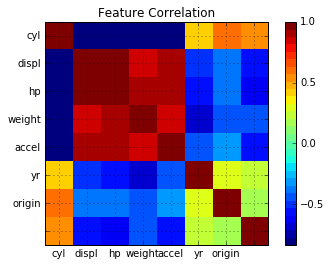

In [185]:
#Visualize correlation
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation')
    labels=['mpg','cyl','displ','hp','weight','accel','yr','origin']
    ax1.set_xticklabels(labels,fontsize=10)
    ax1.set_yticklabels(labels,fontsize=10)
    fig.colorbar(cax, ticks=[-1,-.5,0,.5,1])
    plt.show()

correlation_matrix(df)